In [6]:
# https://python-course.eu/numerical-programming/weighted-probabilities.php

In [7]:
from random import choice, sample

print(choice("abcdefghij"))

professions = ["scientist", "philosopher", "engineer", "priest"]

print(choice(professions))

print(choice(("beginner", "intermediate", "advanced")))

# rolling one die
x = choice(range(1, 7))
print("The dice shows: " + str(x))

# rolling two dice:
dice = sample(range(1, 7), 2)
print("The two dice show: " + str(dice))

g
philosopher
intermediate
The dice shows: 4
The two dice show: [4, 6]


In [8]:
import numpy as np

weights = [0.2, 0.5, 0.3]
cum_weights = [0] + list(np.cumsum(weights))
print(cum_weights)

[0, 0.2, 0.7, 1.0]


In [9]:
import numpy as np

import random

def weighted_choice(objects, weights):
    """ returns randomly an element from the sequence of 'objects', 
        the likelihood of the objects is weighted according 
        to the sequence of 'weights', i.e. percentages."""

    weights = np.array(weights, dtype=np.float64)
    sum_of_weights = weights.sum()
    # standardization:
    np.multiply(weights, 1 / sum_of_weights, weights)
    weights = weights.cumsum()
    x = random.random()
    for i in range(len(weights)):
        if x < weights[i]:
            return objects[i]

In [10]:
from collections import Counter

faces_of_die = [1, 2, 3, 4, 5, 6]
weights = [1/12, 1/6, 1/6, 1/6, 1/6, 3/12]

outcomes = []
n = 10000
for _ in range(n):
    outcomes.append(weighted_choice(faces_of_die, weights))

c = Counter(outcomes)
for key in c:
    c[key] = c[key] / n
    
print(sorted(c.values()), sum(c.values()))

[0.0794, 0.1608, 0.162, 0.1708, 0.1748, 0.2522] 1.0


In [11]:
cities = ["Frankfurt", 
          "Stuttgart", 
          "Freiburg", 
          "München", 
          "Zürich",
          "Hamburg"]
populations = [736000, 628000, 228000, 1450000, 409241, 1841179]
total = sum(populations)
weights = [ round(pop / total, 2) for pop in populations]
print(weights)
for i in range(10):
    print(weighted_choice(cities, populations))

[0.14, 0.12, 0.04, 0.27, 0.08, 0.35]
München
München
Hamburg
München
München
Hamburg
München
Hamburg
Frankfurt
Frankfurt


In [12]:
from numpy.random import choice

professions = ["scientist", 
               "philosopher", 
               "engineer", 
               "priest", 
               "programmer"]

probabilities = [0.2, 0.05, 0.3, 0.15, 0.3]

choice(professions, p=probabilities)

'programmer'

In [13]:
import numpy as np
programming_languages = ["Java", "C", "Python", "C++"]
weights = np.array([16, 15.2, 10, 6.1])

# normalization
weights /= sum(weights) 
print(weights)

for i in range(10):
    print(choice(programming_languages, p=weights))

[0.33826638 0.32135307 0.21141649 0.12896406]
Python
C
C
C
C
Python
Java
Java
C++
C++


In [14]:
def weighted_sample(population, weights, k):
    """ 
    This function draws a random sample (without repeats) 
    of length k     from the sequence 'population' according 
    to the list of weights
    """
    sample = set()
    population = list(population)
    weights = list(weights)
    while len(sample) < k:
        choice = weighted_choice(population, weights)
        sample.add(choice)
        index = population.index(choice)
        weights.pop(index)
        population.remove(choice)
        weights = [ x / sum(weights) for x in weights]
    return list(sample)

candies = ["red", "green", "blue", "yellow", "black", "white", "pink", "orange"]
weights = [ 1/24, 1/6, 1/6, 1/12, 1/12, 1/24, 1/8, 7/24]
for i in range(10):
    print(weighted_sample(candies, weights, 3))

['orange', 'pink', 'blue']
['orange', 'green', 'pink']
['orange', 'pink', 'blue']
['orange', 'yellow', 'blue']
['orange', 'pink', 'blue']
['black', 'orange', 'blue']
['yellow', 'green', 'red']
['orange', 'pink', 'white']
['orange', 'pink', 'blue']
['black', 'green', 'pink']


In [15]:
n = 100000
orange_counter = 0
for i in range(n):
    if "orange" in weighted_sample(candies, weights, 3):
        orange_counter += 1
        
print(orange_counter / n)

0.71185


In [16]:
n = 100000
orange_counter = 0
for i in range(n):
    if "orange" in np.random.choice(candies, 
                                    p=weights, 
                                    size=(3,),
                                    replace=False):
        orange_counter += 1
        
print(orange_counter / n)

0.71311


In [17]:
countries = ["Germany", "Switzerland", 
             "Austria", "Netherlands",
             "Belgium", "Poland", 
             "France", "Ireland"]
weights = np.array([83019200, 8555541, 8869537,
                    17338900, 11480534, 38413000, 
                    67022000, 4857000])
weights = weights / sum(weights)

for i in range(4):
    print(np.random.choice(countries,
                           p=weights, 
                           size=(3,),
                           replace=True))

['Poland' 'Germany' 'Germany']
['France' 'Germany' 'Poland']
['Belgium' 'France' 'Belgium']
['Poland' 'Netherlands' 'Poland']


In [18]:
import numpy as np

def cartesian_choice(*iterables):
    """
    A list with random choices from each iterable of iterables 
    is being created in respective order.
    
    The result list can be seen as an element of the 
    Cartesian product of the iterables 
    """
    res = []
    for population in iterables:
        res.append(np.random.choice(population))
    return res


cartesian_choice(["The", "A"],
                 ["red", "green", "blue", "yellow", "grey"], 
                 ["car", "house", "fish", "light"],
                 ["smells", "dreams", "blinks", "shines"])

['A', 'yellow', 'fish', 'smells']

In [19]:
import numpy as np

def weighted_cartesian_choice(*iterables):
    """
    An arbitrary number of tuple or lists,
    each consisting of population and weights.
    weighted_cartesian_choice returns a list 
    with a chocie from each population
    """
    res = []
    for population, weights in iterables:
        # normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res

determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["water", "elephant", "fish", "light", "programming language"], 
         [0.3, 0.2, 0.1, 0.1, 0.3])
nouns2 = (["of happiness", "of chocolate", "of wisdom", "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])
verb_phrases = (["smells", "dreams", "thinks", "is made of"], 
         [0.4, 0.3, 0.2, 0.1])

print("It may or may not be true:")
for i in range(10):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    print(" ".join(res) + ".")

It may or may not be true:
The green programming language thinks of happiness.
The yellow programming language smells of happiness.
A blue programming language smells of air.
A blue elephant smells of air.
The yellow programming language dreams of chocolate.
The green elephant dreams of wisdom.
The green elephant dreams of happiness.
Each yellow light smells of wisdom.
A green light smells of challenges.
A grey fish thinks of challenges.


In [20]:
import random

def weighted_cartesian_choice(*iterables):
    """
    A list with weighted random choices from each iterable of iterables 
    is being created in respective order
    """
    res = []
    for population, weight in iterables:
        lst = weighted_choice(population, weight)
        res.append(lst)
    return res

determiners = (["The", "A", "Each", "Every", "No"], 
               [0.3, 0.3, 0.1, 0.1, 0.2])
colours = (["red", "green", "blue", "yellow", "grey"], 
           [0.1, 0.3, 0.3, 0.2, 0.2])
nouns = (["water", "elephant", "fish", "light", "programming language"], 
         [0.3, 0.2, 0.1, 0.1, 0.3])
nouns2 = (["of happiness", "of chocolate", "of wisdom", "of challenges", "of air"], 
         [0.5, 0.2, 0.1, 0.1, 0.1])
verb_phrases = (["smells", "dreams", "thinks", "is made of"], 
         [0.4, 0.3, 0.2, 0.1])

print("It may or may not be true:")
sentences = []
for i in range(10000):
    res = weighted_cartesian_choice(determiners,
                                    colours,
                                    nouns,
                                    verb_phrases,
                                    nouns2)
    sentences.append(" ".join(res) + ".")

words = ["smells", "dreams", "thinks", "is made of"]
from collections import Counter
c = Counter()
for sentence in sentences:
    for word in words:
        if word in sentence:
            c[word] += 1
  
wsum = sum(c.values())
for key in c:
    print(key, c[key] / wsum)

It may or may not be true:
smells 0.3992
thinks 0.1994
dreams 0.3009
is made of 0.1005


In [21]:
from random import gauss

n = 1000

values = []
frequencies = {}

while len(values) < n:
    value = gauss(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)
        
print(values[:10])

[170.04829150183124, 132.4005349506029, 145.86421474671693, 152.08501361339245, 165.53994644822697, 156.64763378501635, 210.57380969352116, 138.79482426596695, 188.14541310898272, 184.64262254991385]


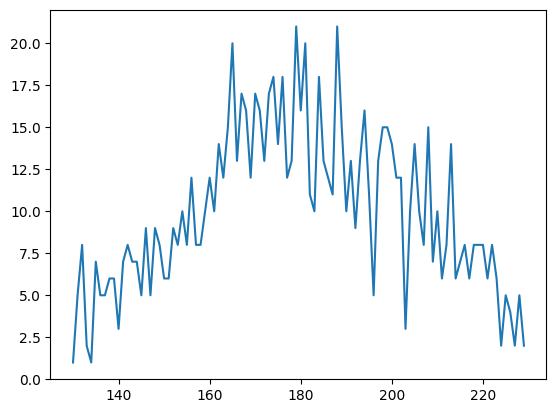

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

freq = list(frequencies.items())
freq.sort()


plt.plot(*list(zip(*freq)))

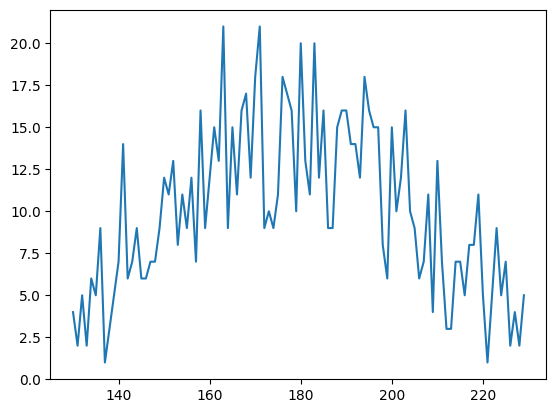

In [23]:
from random import normalvariate

n = 1000

values = []
frequencies = {}

while len(values) < n:
    value = normalvariate(180, 30)
    if 130 < value < 230:
        frequencies[int(value)] = frequencies.get(int(value), 0) + 1
        values.append(value)

freq = list(frequencies.items())
freq.sort()


plt.plot(*list(zip(*freq)))

In [24]:
import random

def random_ones_and_zeros(p):
    """ p: probability 0 <= p <= 1
        returns a 1 with the probability p
    """
    x = random.random()
    if x < p:
        return 1
    else:
        return 0

In [25]:
n = 1000000
sum(random_ones_and_zeros(0.8) for i in range(n)) / n

0.800102

In [26]:
import random

def random_ones_and_zeros(p):
    while True:
        x = random.random()
        yield 1 if x < p else 0
        
def firstn(generator, n):
	for i in range(n):
		yield next(generator)
n = 1000000
sum(x for x in firstn(random_ones_and_zeros(0.8), n)) / n

0.800066

In [27]:
def ebitter(bitstream):
    while True:
        bit1 = next(bitstream)
        bit2 = next(bitstream)
        if bit1 + bit2 == 1:
            bit3 = next(bitstream)
            if bit2 + bit3 == 1:
                yield 1
            else:
                yield 0
        
def ebitter2(bitstream):
    bit1 = next(bitstream)
    bit2 = next(bitstream)
    bit3 = next(bitstream)
    while True:
        if bit1 + bit2 == 1:
            if bit2 + bit3 == 1:
                yield 1
            else:
                yield 0
        bit1, bit2, bit3 = bit2, bit3, next(bitstream)

In [28]:
n = 1000000
sum(x for x in firstn(ebitter(random_ones_and_zeros(0.8)), n)) / n

0.49956

In [29]:
n = 1000000
sum(x for x in firstn(ebitter2(random_ones_and_zeros(0.8)), n)) / n

0.499865

In [30]:
import numpy as np

sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 2099.13,  723.99, 990.37, 541.44, 1765.00, 1802.84, 1999.00])

In [31]:
min_percent = 0.98  # corresponds to -1.5 %
max_percent = 1.06   # 6 %
growthrates = (max_percent - min_percent) * np.random.random_sample(12) + min_percent
print(growthrates)

[1.05859081 1.00864354 1.01560633 1.00524559 1.03041038 1.04069932
 0.98585085 0.99404069 1.02045361 1.05869333 1.02328606 1.02486616]


In [32]:
sales * growthrates

array([1318.88770604, 2239.18865412, 1661.29837016, 1946.40677158,
       1032.50211111, 2184.56316855,  713.74615739,  984.4680807 ,
        552.51440355, 1868.59372321, 1844.82103418, 2048.70744434])

In [33]:
import numpy as np
fh = open("sales_figures.csv", "w")

fh.write("Year, Frankfurt, Munich, Berlin, Zurich, Hamburg, London, Toronto, Strasbourg, Luxembourg, Amsterdam, Rotterdam, The Hague\n")
sales = np.array([1245.89, 2220.00, 1635.77, 1936.25, 1002.03, 2099.13,  723.99, 990.37, 541.44, 1765.00, 1802.84, 1999.00])

for year in range(1997, 2016):
    line = str(year) + ", " + ", ".join(map(str, sales))
    fh.write(line + "\n")
    if year % 4 == 0:
         min_percent = 0.98  # corresponds to -1.5 %
         max_percent = 1.06   # 6 %
         growthrates = (max_percent - min_percent) * np.random.random_sample(12) + min_percent
         #growthrates = 1 + (np.random.rand(12) * max_percent - negative_max) / 100
    sales = np.around(sales * growthrates, 2)
fh.close()

In [34]:
from random import randint

outcomes = [ randint(1, 6) for _ in range(100000)]

even_pips = [ x for x in outcomes if x % 2 == 0]
greater_two = [ x for x in outcomes if x > 2]

combined = [ x for x in outcomes if x % 2 == 0 and x > 2]

print(len(even_pips) / len(outcomes))
print(len(greater_two) / len(outcomes))
print(len(combined) / len(outcomes))

0.50102
0.66629
0.33382


In [35]:
def process_datafile(filename):
    """ process_datafile -> (universities, 
                             enrollments, 
                             total_number_of_students) 
        universities: list of University names
        enrollments: corresponding list with enrollments
        total_number_of_students: over all universities
    """

    universities = []
    enrollments = []
    with open(filename) as fh:
        total_number_of_students = 0
        fh.readline() # get rid of descriptive first line
        for line in fh:
             line = line.strip()
             *praefix, undergraduates, postgraduates, total = line.rsplit()
             university = praefix[1:]
             total = int(total.replace(",", ""))
             enrollments.append(total)
             universities.append(" ".join(university))
             total_number_of_students += total
    return (universities, enrollments, total_number_of_students)

universities, enrollments, total_students = process_datafile("universities_uk.txt")

for i in range(14):
    print(universities[i], end=": ")
    print(enrollments[i])
print("Total number of students enrolled in the UK: ", total_students)

The Open University: 129420
University College London[b]: 41095
University of Manchester: 40485
Coventry University: 38430
University of Leeds: 36330
Nottingham Trent University: 35785
University of Birmingham: 35760
University of Edinburgh: 35375
University of Nottingham: 34840
Manchester Metropolitan University: 33420
Cardiff University: 33260
King's College London[b]: 33110
University of Glasgow: 32465
Sheffield Hallam University: 30960
Total number of students enrolled in the UK:  2429465


In [36]:
normalized_enrollments = [ students / total_students for students in enrollments]

# enrolling a virtual student:
print(weighted_choice(universities, normalized_enrollments))

Ulster University


In [37]:
from collections import Counter

outcomes = []
n = 100000
for i in range(n):
    outcomes.append(weighted_choice(universities, normalized_enrollments))

c = Counter(outcomes)
    
print(c.most_common(20))

[('The Open University', 5431), ('University College London[b]', 1718), ('Coventry University', 1621), ('University of Manchester', 1588), ('University of Leeds', 1504), ('University of Nottingham', 1465), ('University of Birmingham', 1461), ('Nottingham Trent University', 1440), ('University of Edinburgh', 1376), ('Manchester Metropolitan University', 1372), ('Cardiff University', 1366), ("King's College London[b]", 1339), ('University of Liverpool', 1320), ('University of Glasgow', 1302), ('University of the West of England', 1270), ('Sheffield Hallam University', 1266), ('Newcastle University', 1225), ('Northumbria University', 1193), ('De Montfort University', 1170), ('Birmingham City University', 1168)]
